## **[한글 분석 + 워드클라우드]**

### **한글 뉴스 기사의 키워드 분석하기**

#### **분석 미리보기**

* 목표: '4차 산업혁명'에 관한 한글 기사에서 명사 키워드를 분석한다.
* 핵심 개념: 형태소 분석, 품사 태깅
* 데이터 수집: 4차 산업혁명 기사: 페이스북 전자 신문 페이지에서 크롤링하여 저장한 json 파일
* 데이터 준비:
    1. 데이터 추출: json 파일에서 message 항목만 추출, key()
    2. 명사 단어 추출: Okt 품사 태깅 패키지로 명사 추출, from konlpy.tag import Okt
* 데이터 탐색 및 모델링:
    1. 단어 빈도 검색: Counter()
    2. 단어 빈도 히스토그램: font_manager.FontProperties(), matplotlib.pyplot

#### **핵심 개념 이해**

이번 프로젝트를 수향하려면 형태소 분석과 품사 태깅(POS)Part-Of-Speech에 대해 알아야 한다.
형태소 분석과 품사 태깅은 모든 단어의 텍스트 분석에 필요한 작업이다.
언어마다 해당 언어의 문법과 구성에 맞는 형태소 분석과 품사 태깅 패키지가 필요하다.
한글 텍스트 분석을 위해서는 국내에서 개발한 오픈 소스 프로젝트인 KoNLPy 패키지를 사용한다.

##### **형태소와 형태소 분석**

형태소(morpheme)는 언어에서 의미가 있는 가장 작은 단위를 말한다.
단어는 의미를 갖는 문장의 가장 작은 단일 요소로, 문장에서 분리될 수 있는 부분이다.
독립형 형태소인 단어도 있지만, 대부분 단어는 형태소와 접사로 구성된다.
형태소 분석(morpheme analysis)은 형태소, 어근, 접두사/접미사, 품사 등 다양한 언어학적 속성으로 구조를 파악하는 것이다.

##### **품사 태깅**

형태소의 뜻과 문맥을 고려하여 품사를 붙이는 것이다.

예) 가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ다/EFN

##### **품사 태깅 패키지**

파이썬 패키지인 KoNLPy에서 사용할 수 있는 품사 태깅 패키지에는 Hannanum, Kkma, Komoran, Mecab, Okt(Twitter) 등이 있다.

#### **데이터 준비**

프로젝트에 필요한 파이썬 패키지를 임포트하고, json 파일을 읽어서 분석할 데이터를 준비한다.

In [ ]:
!pip install konlpy

In [2]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [3]:
inputFileName = './etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
data = json.loads(
    open(inputFileName + '.json', 'r', encoding='utf-8').read()
)

In [4]:
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

* json: josn 파일을 다루기 위한 모듈
* Okt: 한글 품사 태깅을 위한 모듈

데이터에 저장된 json 구조에서 'message' 키의 내용이 분석할 뉴스 본문 데이터이다.
'message' 키의 데이터에서 품사가 명사인 단어만 추출한다.

In [5]:
message = ''

for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'^[\w]', ' ', item['message']) + ''

In [6]:
message

' 월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다. 봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다. 차 산업혁명 시대 금융 산업 전반 점검해야 한다는... 통 간판 공약은 \'4차 산업혁명 선도 도시 구현\'과 \'가상화폐·블록체인 기술 활용\' 등입니다. https://goo.gl/qPEyAJ 번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇, 빅데이터 산업 흐름을 알려줍니다. #인공지능 #최고위과정 #산학연최고전문가 https://goo.gl/jSZSNX 차 산업혁명 모든 기술과 서비스 구현 업혁명의 나라, 영국엔 4차 산업혁명이 없다?\n한국-영국 경험과 지혜를 모으는 ‘미래비즈니스포럼 2017’ 개최[전자신문TV 라이브] SBA 신직업위크\n\n4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원(SBA)이 자신들의 역량과 노력을 모두 담은 \'제 2회 신직업위크\'를 진행하고 있습니다.\n\n이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석, 윤석원 테스트웍스 대표 등과 함께 \'제 2회 신직업위크\'와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다. 많은 시청 바랍니다. \n\n#전자신문 #전자신문엔터 #전자신문TV #라이브 #소셜방송 #현장라이브 #손보련 #신직업위크 #서울산업진흥원 #SBA #신직업 #서울 #강만구 #서지윤 #윤석원

In [7]:
nlp = Okt()
message_N = nlp.nouns(message)

In [8]:
message_N

['월',
 '스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '구현',
 '업',
 '혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',
 '직업',
 '산업',
 '진흥',
 '이',
 '자신',
 '역량',


#### **데이터 탐색 및 분석 모델 구축**

명사를 추출하여 저장한 message_N에 있는 단어들을 탐색해본다.

In [9]:
count = Counter(message_N)

In [10]:
count

Counter({'차': 22,
         '산업혁명': 20,
         '산업': 8,
         '기술': 8,
         '전자신문': 8,
         '직업': 8,
         '시대': 7,
         '라이브': 5,
         '일자리': 5,
         '창': 5,
         '이번': 5,
         '포럼': 4,
         '조직': 4,
         '통해': 4,
         '진흥': 4,
         '진행': 4,
         '스파크': 3,
         '미래': 3,
         '변화': 3,
         '사회': 3,
         '기업': 3,
         '등': 3,
         '위': 3,
         '노력': 3,
         '시간': 3,
         '대응': 3,
         '전자': 3,
         '정보': 3,
         '이슈': 2,
         '우리': 2,
         '위해': 2,
         '사례': 2,
         '주요': 2,
         '국내': 2,
         '로봇': 2,
         '구현': 2,
         '활용': 2,
         '빅데이터': 2,
         '흐름': 2,
         '서비스': 2,
         '혁명': 2,
         '영국': 2,
         '한국': 2,
         '경쟁력': 2,
         '제': 2,
         '를': 2,
         '서울': 2,
         '교육': 2,
         '팀': 2,
         '대표': 2,
         '시청': 2,
         '가장': 2,
         '과제': 2,
         '주형': 2,
         '철': 2,
     

In [11]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s: %d" % (tag, counts))

산업혁명: 20
산업: 8
기술: 8
전자신문: 8
직업: 8
시대: 7
라이브: 5
일자리: 5
이번: 5
포럼: 4
조직: 4
통해: 4
진흥: 4
진행: 4
스파크: 3
미래: 3
변화: 3
사회: 3
기업: 3
노력: 3
시간: 3
대응: 3
전자: 3
정보: 3
이슈: 2
우리: 2
위해: 2
사례: 2
주요: 2
국내: 2
로봇: 2
구현: 2
활용: 2
빅데이터: 2
흐름: 2
서비스: 2
혁명: 2
영국: 2
한국: 2
경쟁력: 2
서울: 2
교육: 2
대표: 2
시청: 2
가장: 2
과제: 2
주형: 2
대표이사: 2
공공기관: 2
중소기업: 2
모시: 2
국정: 2
컨퍼런스: 2
행사: 2
방송: 2
페이스북: 2
대비: 2
시작: 1
문제: 1
제기: 1
혁신: 1
해결: 1
소셜: 1
이노: 1
베이: 1
발굴: 1
지원: 1


단어 빈도를 시각적으로 탐색하기 위해 히스토그램을 그려본다.

In [12]:
font_path = 'c:/Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [13]:
matplotlib.rc('font', family=font_name)

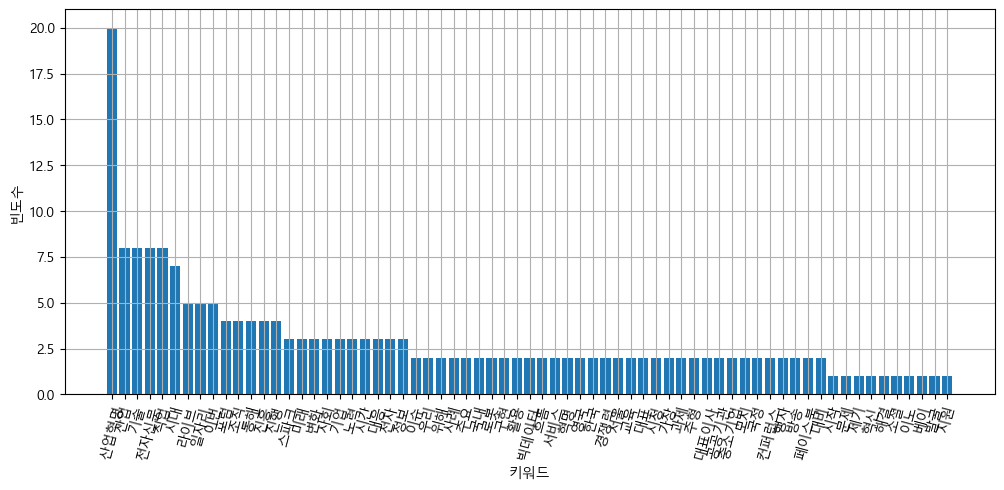

In [15]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

#### **결과 시각화**

페이스북 전자신문 페이지의 기사에서 명사 키워드를 분석하기 위해 단어 구성을 탐색하였다.
단어 빈도 분석 결과를 워드클라우드로 시각화해본다.

In [16]:
wc = WordCloud(
    font_path,
    background_color='ivory',
    width=800,
    height=600,
)

In [17]:
cloud = wc.generate_from_frequencies(word_count)

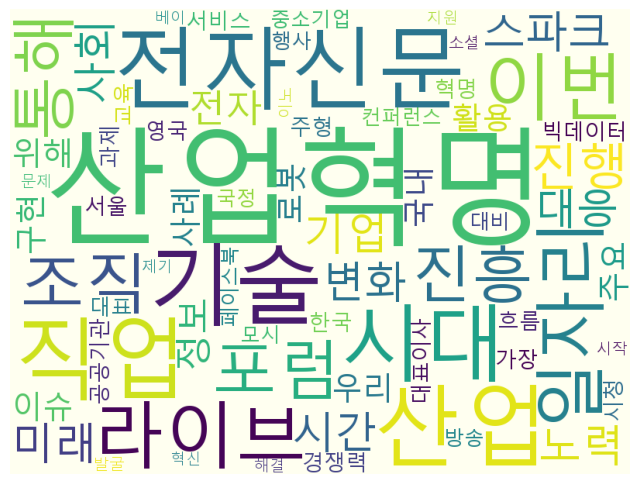

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [19]:
cloud.to_file(inputFileName + '_cloud.jpg')